In [4]:
import numpy as np
import pandas as pd
import os
import json
import glob

In [5]:
papers = glob.glob('CORD-19-research-challenge/**/*.json', recursive=True)
meta = pd.read_csv('CORD-19-research-challenge/metadata.csv')  

In [42]:
#create a dataframe of all the json files
def createDF(): 
    corona = pd.DataFrame(columns = ['paper_id', 'title', 'authors', 'abstract', 'text'])
    for file in papers:
        row = {"paper_id": None, "title": None, "authors": None, "abstract": None, "text": None}
        with open(file) as json_data:
            data = json.load(json_data)
        
        #assigning the values from the json file to the dataframe row
        row['paper_id'] = data['paper_id']
        row['title'] = data['metadata']['title']
        
        #making a list of authors
        authorList = [(str(author['first']) + ' ' + str(author['last'])) for author in data['metadata']['authors']]
        authors = ", ".join(authorList)
        row['authors'] = authors
        
        #check if abstract exists in json file, join all parts/paragraphs of abstract
        if data.get('abstract'):
            abstract_paras = [abst['text'] for abst in data['abstract']]
            abstract = " ".join(abstract_paras)
        else: 
            abstract = None
        row['abstract'] = abstract
        
        #check if full body text exists in json file, join all paragraphs
        if data.get('body_text'):
            text_paras = [body['text'] for body in data['body_text']]
            text = " ".join(text_paras)
        else:
            text = None
        row['text'] = text
        
        corona = corona.append(row, ignore_index = True)
    return corona

corona = createDF()

In [96]:
def removePunc(my_str): 
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    # To take input from the user
    # my_str = input("Enter a string: ")

    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

corona = pd.DataFrame(corona)
corona = corona[corona['text'].notna()]
corona.head()
corona['cleanedText'] = 0
corona['words'] = 0
for i in corona.index: 
    corona['cleanedText'][i] = removePunc(corona['text'][i])
    corona['words'][i] = corona['cleanedText'][i].split()
corona['words'].dropna()
corona.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,paper_id,title,authors,abstract,text,cleanedText,words
1,PMC7109766,Reply to Tso et al,"Xinchun Chen, Boping Zhou, Meizhong Li, Xiaoro...",None,\nTo the Editor—We appreciate the letters from...,\nTo the Editor—We appreciate the letters from...,"[To, the, Editor—We, appreciate, the, letters,..."
2,PMC7107989,Acute Respiratory Distress Syndrome and Pneumo...,"Torsten Bauer, Santiago Ewig, Arne Rodloff, Ec...",None,The sequence from bacterial pneumonia to ARDS ...,The sequence from bacterial pneumonia to ARDS ...,"[The, sequence, from, bacterial, pneumonia, to..."
3,PMC7121640,Autoimmune Processes in the Central Nervous Sy...,"Abel Lajtha, Armen Galoyan, Hugo Besedovsky, C...",None,The central nervous system (CNS) has been cons...,The central nervous system CNS has been consid...,"[The, central, nervous, system, CNS, has, been..."
4,PMC7094896,Critics slam treatment for SARS as ineffective...,David Cyranoski,None,Health authorities in Hong Kong are coming und...,Health authorities in Hong Kong are coming und...,"[Health, authorities, in, Hong, Kong, are, com..."
5,PMC3320336,Emerging Infectious Diseases: a 10-Year Perspe...,"Anthony Fauci, Nancy Touchette, Gregory Folkers",None,HIV/AIDS has resulted in the death of >20 mill...,HIVAIDS has resulted in the death of 20 millio...,"[HIVAIDS, has, resulted, in, the, death, of, 2..."


In [97]:
import nltk

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        

for i in corona.index: 
    text = corona['cleanedText'][i]
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    corona['words'][i] = nouns
    corona['cleanedText'][i] = listToString(nouns)
corona.head()

,paper_id,title,authors,abstract,text,cleanedText,words
1,PMC7109766,Reply to Tso et al,"Xinchun Chen, Boping Zhou, Meizhong Li, Xiaoro...",None,\nTo the Editor—We appreciate the letters from...,Editor—We letters Tso study profile respirator...,"[Editor—We, letters, Tso, study, profile, resp..."
2,PMC7107989,Acute Respiratory Distress Syndrome and Pneumo...,"Torsten Bauer, Santiago Ewig, Arne Rodloff, Ec...",None,The sequence from bacterial pneumonia to ARDS ...,sequence pneumonia persons CAP Estenssoro pati...,"[sequence, pneumonia, persons, CAP, Estenssoro..."
3,PMC7121640,Autoimmune Processes in the Central Nervous Sy...,"Abel Lajtha, Armen Galoyan, Hugo Besedovsky, C...",None,The central nervous system (CNS) has been cons...,system CNS site transplantation work Peter Med...,"[system, CNS, site, transplantation, work, Pet..."
4,PMC7094896,Critics slam treatment for SARS as ineffective...,David Cyranoski,None,Health authorities in Hong Kong are coming und...,Health authorities Hong Kong criticism use dru...,"[Health, authorities, Hong, Kong, criticism, u..."
5,PMC3320336,Emerging Infectious Diseases: a 10-Year Perspe...,"Anthony Fauci, Nancy Touchette, Gregory Folkers",None,HIV/AIDS has resulted in the death of >20 mill...,HIVAIDS death persons world cause death person...,"[HIVAIDS, death, persons, world, cause, death,..."


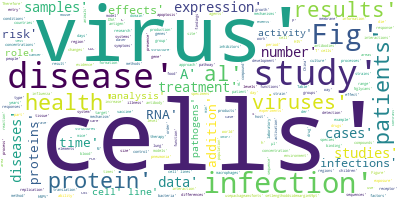

In [55]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(str(elem) for elem in corona['words'].values.tolist())

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)


# Visualize the word cloud
wordcloud.to_image()

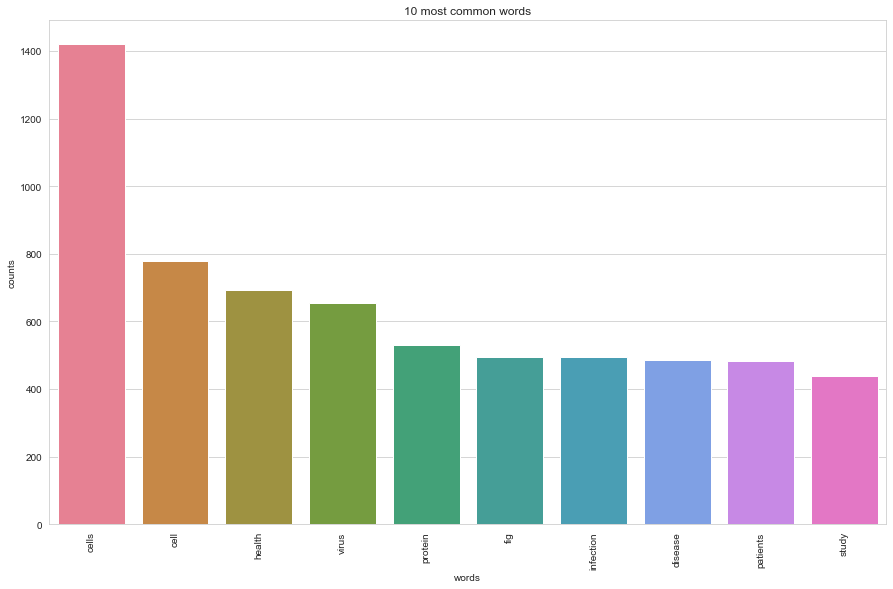

In [99]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(corona['cleanedText'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [105]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 20
# Create and fit the LDA model

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
blood cells protein al expression pcr cell hspgs figure hs study gene unit host studies units surface infection pathogens syphilis

Topic #1:
setlengthoddsidemargin69pt usepackageamsfonts viruses infants study ngs specimens compounds samples methods laboratory activity data pcr respiratory compound pathogens results hmpv virus

Topic #2:
cells cell line lines schwann protein culture membrane medium ards serum expression virus infection hmpv fig study proteins mβcd apoptosis

Topic #3:
cells fip fig week cell females coyotes day effusions progesterone δtnc levels study tncc ga sln estrus npdc results cats

Topic #4:
disease health samples diseases wind illness rtpcr definition case virus patients fig begindocument setlengthoddsidemargin69pt usepackageamsfonts sarscov china pedv study sars

Topic #5:
patients virus viruses pneumonia golgi respiratory study infections samples rna infection sseg studies cells bacteria translation hm figure therapy water

To